# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/cs230/womens_edu

/content/drive/MyDrive/Colab Notebooks/cs230/womens_edu


In [3]:
import argparse
import io
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   ../sustainbench/sustainbench/download_datasets.py
	modified:   data_preprocessing.ipynb
	modified:   womens_edu_regressor.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	../sustainbench/dhs/
	data/
	pretrained_resnet/

no changes added to commit (use "git add" and/or "git commit -a")


In [5]:
!git config --global user.email "disaaldan@gmail.com"
!git config --global user.name "disaalda"

# Satellite Imagery

## Read In Data

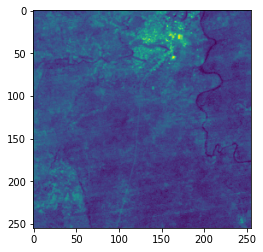

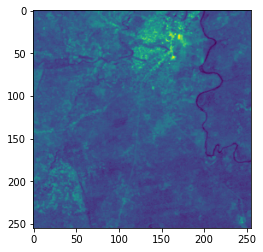

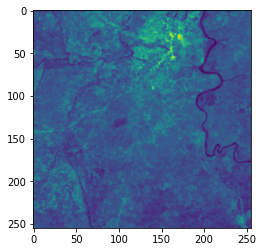

In [ ]:
dfile = "data/dhs_TD_ZW/ZM-2007-5#/ZM-2007-5#-00000320.npz"
images = np.load(dfile)['x']
images.shape
images = images[:3,:,:]

for i in range(len(images)):
  plt.ion()
  plt.figure()
  plt.imshow(images[i])

In [ ]:
images.shape

(3, 255, 255)

In [ ]:
dfile = "data/dhs_TD_ZW/ZM-2007-5#/ZM-2007-5#-00000320.npz"
images = np.load(dfile)['x']
images.shape

(8, 255, 255)

In [ ]:
 # try converting this to RGB images with 3 channels??
from PIL import Image
image_rgb = Image.fromarray(images[:3,:,:], 'RGB')
image_rgb

## Create a Dataset with Labels and Image Path

In [ ]:
dataset_root_dir = '/content/drive/MyDrive/Colab Notebooks/cs230/womens_edu/data/'

In [ ]:
df = pd.read_csv(os.path.join(dataset_root_dir, 'dhs_final_labels.csv'))
len(df)

117644

In [ ]:
df['survey'] = df['DHSID_EA'].str[:10]
df['cc'] = df['DHSID_EA'].str[:2]
df['path'] = dataset_root_dir + '/dhs_TD_ZW/' + df['survey'] + '/' + df['DHSID_EA'] + '.npz'

In [ ]:
df.head()

,DHSID_EA,cname,year,lat,lon,n_asset,asset_index,n_water,water_index,n_sanitation,...,women_bmi,n_women_edu,n_women_bmi,cluster_id,adm1fips,adm1dhs,urban,survey,cc,path
0,AL-2008-5#-00000001,AL,2008,40.822652,19.838321,18.0,2.430596,18.0,3.444444,18.0,...,24.365000,18.0,18.0,1,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
1,AL-2008-5#-00000002,AL,2008,40.696846,20.007555,20.0,2.867678,20.0,4.700000,20.0,...,23.104000,20.0,20.0,2,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
2,AL-2008-5#-00000003,AL,2008,40.750037,19.974262,18.0,2.909049,18.0,4.500000,18.0,...,22.387778,18.0,18.0,3,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
3,AL-2008-5#-00000004,AL,2008,40.798931,19.863338,19.0,2.881122,19.0,4.947368,19.0,...,27.084500,21.0,20.0,4,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
4,AL-2008-5#-00000005,AL,2008,40.746123,19.843885,19.0,2.546830,19.0,4.684211,19.0,...,24.523125,16.0,16.0,5,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...


In [ ]:
# subset a dataset with just 'ZM'/'TJ'
df_sub = df[ df['cc']=='TJ' ]
#zm_path_years = df_zm[['DHSID_EA', 'path', 'year']].apply(tuple, axis=1)
df_sub.set_index('DHSID_EA', verify_integrity=True, inplace=True)

In [ ]:
year_count = df_zm.groupby(['year'])['year'].count()
year_count

year
2012    343
2017    365
Name: year, dtype: int64

In [ ]:
label_cols = ['year','women_edu', 'path']
df_sub = df_sub[label_cols]

In [ ]:
df_sub.to_csv(os.path.join(dataset_root_dir, 'TJ_satellite.csv'))

# Street-Level Imagery

In [ ]:
street_df =  pd.read_csv(os.path.join(dataset_root_dir, 'KY.csv'))

In [ ]:
street_df['img_path'] = dataset_root_dir + street_df['img_path']
street_df.head()

,DHSID_EA,country_code,year,img_captured_at,img_lon,img_lat,img_id,img_path
0,KY-2012-6#-00000210,KY,2012,1431267666548,74.460870,43.051974,2683402805284887,/content/drive/MyDrive/Colab Notebooks/cs230/w...
1,KY-2012-6#-00000210,KY,2012,1431267739832,74.470439,43.053836,859209238017030,/content/drive/MyDrive/Colab Notebooks/cs230/w...
2,KY-2012-6#-00000210,KY,2012,1431267636142,74.452695,43.050860,518307519178827,/content/drive/MyDrive/Colab Notebooks/cs230/w...
3,KY-2012-6#-00000210,KY,2012,1431267747422,74.470359,43.054024,1370367363330031,/content/drive/MyDrive/Colab Notebooks/cs230/w...
4,KY-2012-6#-00000210,KY,2012,1431267686722,74.465621,43.052592,473814717185741,/content/drive/MyDrive/Colab Notebooks/cs230/w...


In [ ]:
street_df['img_id'] = street_df['img_id'].astype(str)

In [ ]:
street_df['img_path_resized'] =  os.path.join(dataset_root_dir, 'KY') + '/' + street_df['DHSID_EA'] + '/' + street_df['img_id'] + ' resized.jpg'

In [ ]:
street_df.head()

,DHSID_EA,country_code,year,img_captured_at,img_lon,img_lat,img_id,img_path,img_path_resized
0,KY-2012-6#-00000210,KY,2012,1431267666548,74.460870,43.051974,2683402805284887,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...
1,KY-2012-6#-00000210,KY,2012,1431267739832,74.470439,43.053836,859209238017030,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...
2,KY-2012-6#-00000210,KY,2012,1431267636142,74.452695,43.050860,518307519178827,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...
3,KY-2012-6#-00000210,KY,2012,1431267747422,74.470359,43.054024,1370367363330031,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...
4,KY-2012-6#-00000210,KY,2012,1431267686722,74.465621,43.052592,473814717185741,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...


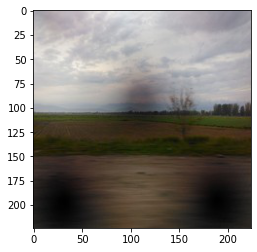

In [ ]:
image = plt.imread(street_df['img_path_resized'][1000])
plt.imshow(image)

In [ ]:
image.shape # permute this later on 

(224, 224, 3)

In [ ]:
year_count = street_df.groupby(['year'])['year'].count()
year_count

year
2012    1105
Name: year, dtype: int64

In [ ]:
# left join labels to street metadata df
street_labels_df = street_df.merge(df[['DHSID_EA','women_edu']], on='DHSID_EA', how='left')
street_labels_df.head(10)

,DHSID_EA,country_code,year,img_captured_at,img_lon,img_lat,img_id,img_path,img_path_resized,women_edu
0,KY-2012-6#-00000210,KY,2012,1431267666548,74.460870,43.051974,2683402805284887,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
1,KY-2012-6#-00000210,KY,2012,1431267739832,74.470439,43.053836,859209238017030,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
2,KY-2012-6#-00000210,KY,2012,1431267636142,74.452695,43.050860,518307519178827,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
3,KY-2012-6#-00000210,KY,2012,1431267747422,74.470359,43.054024,1370367363330031,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
4,KY-2012-6#-00000210,KY,2012,1431267686722,74.465621,43.052592,473814717185741,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
5,KY-2012-6#-00000210,KY,2012,1431267752512,74.470076,43.054048,137005738405630,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
6,KY-2012-6#-00000210,KY,2012,1431267737290,74.470452,43.053807,1195808654199791,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
7,KY-2012-6#-00000210,KY,2012,1431267653977,74.457561,43.051551,938132660062541,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
8,KY-2012-6#-00000210,KY,2012,1431267603401,74.443755,43.049638,1169125583519047,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
9,KY-2012-6#-00000210,KY,2012,1431267726866,74.470536,43.053363,462516511526488,/content/drive/MyDrive/Colab Notebooks/cs230/w...,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091


In [ ]:
street_labels_df = street_labels_df.rename(columns={'img_path_resized':'path'})
street_labels_df = street_labels_df[['DHSID_EA', 'country_code', 'year', 'path', 'women_edu']]

In [ ]:
street_labels_df.to_csv(dataset_root_dir + 'KY_cleaned.csv')

In [ ]:
street_labels_df.head()

,DHSID_EA,country_code,year,path,women_edu
0,KY-2012-6#-00000210,KY,2012,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
1,KY-2012-6#-00000210,KY,2012,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
2,KY-2012-6#-00000210,KY,2012,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
3,KY-2012-6#-00000210,KY,2012,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091
4,KY-2012-6#-00000210,KY,2012,/content/drive/MyDrive/Colab Notebooks/cs230/w...,9.909091


## Resize Images to 224x224 

In [ ]:
from PIL import Image
import os, sys

path = os.path.join(dataset_root_dir, "TJ")
dirs = os.listdir( path )
print(path)
print(dirs)

/content/drive/MyDrive/Colab Notebooks/cs230/womens_edu/data/TJ
['TJ-2017-7#-00000154', 'TJ-2017-7#-00000350', 'TJ-2017-7#-00000196', 'TJ-2017-7#-00000191', 'TJ-2017-7#-00000357', 'TJ-2017-7#-00000303', 'TJ-2017-7#-00000131', 'TJ-2017-7#-00000136', 'TJ-2017-7#-00000304', 'TJ-2017-7#-00000100', 'TJ-2017-7#-00000332', 'TJ-2017-7#-00000335', 'TJ-2017-7#-00000138', 'TJ-2017-7#-00000356', 'TJ-2017-7#-00000164', 'TJ-2017-7#-00000190', 'TJ-2017-7#-00000197', 'TJ-2017-7#-00000163', 'TJ-2017-7#-00000358', 'TJ-2017-7#-00000155', 'TJ-2017-7#-00000360', 'TJ-2017-7#-00000152', 'TJ-2017-7#-00000106', 'TJ-2017-7#-00000139', 'TJ-2017-7#-00000333', 'TJ-2017-7#-00000101', 'TJ-2017-7#-00000305', 'TJ-2017-7#-00000137', 'TJ-2017-7#-00000130', 'TJ-2017-7#-00000302', 'TJ-2017-7#-00000354', 'TJ-2017-7#-00000330', 'TJ-2017-7#-00000105', 'TJ-2017-7#-00000308', 'TJ-2017-7#-00000301', 'TJ-2017-7#-00000133', 'TJ-2017-7#-00000134', 'TJ-2017-7#-00000306', 'TJ-2017-7#-00000339', 'TJ-2017-7#-00000194', 'TJ-2017-7#-000

In [ ]:
def resize():
    for d in dirs:
      folder = os.listdir( os.path.join(path, d)) 
      for item in folder:
        #print(item)
        file_path = os.path.join(path, d, item)
        folder_path = os.path.join(path, d)
        if os.path.isfile(file_path):
          #print()
          #print(file_path)
          im = Image.open(file_path)
          f, e = os.path.splitext(file_path)
          imResize = im.resize((224,224), Image.ANTIALIAS)
          #print( f + '_resized.jpg')
          imResize.save( f+ '_resized.jpg', 'JPEG', quality=90)

resize()

KeyboardInterrupt: ignored

# Create Clusters

In [ ]:
df.head()

,DHSID_EA,cname,year,lat,lon,n_asset,asset_index,n_water,water_index,n_sanitation,...,women_bmi,n_women_edu,n_women_bmi,cluster_id,adm1fips,adm1dhs,urban,survey,cc,path
0,AL-2008-5#-00000001,AL,2008,40.822652,19.838321,18.0,2.430596,18.0,3.444444,18.0,...,24.365000,18.0,18.0,1,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
1,AL-2008-5#-00000002,AL,2008,40.696846,20.007555,20.0,2.867678,20.0,4.700000,20.0,...,23.104000,20.0,20.0,2,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
2,AL-2008-5#-00000003,AL,2008,40.750037,19.974262,18.0,2.909049,18.0,4.500000,18.0,...,22.387778,18.0,18.0,3,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
3,AL-2008-5#-00000004,AL,2008,40.798931,19.863338,19.0,2.881122,19.0,4.947368,19.0,...,27.084500,21.0,20.0,4,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
4,AL-2008-5#-00000005,AL,2008,40.746123,19.843885,19.0,2.546830,19.0,4.684211,19.0,...,24.523125,16.0,16.0,5,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...


In [ ]:
print(len(df[ df['cname'] == 'TJ' ]))
print(len(df[ df['cname'] == 'TJ' ]['cluster_id'].unique()))

708
366
